In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
import os
import io
import random

In [2]:
df1 = pd.read_csv("/content/clustering_data.csv")

<ipython-input-2-f9531d3a31db>:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("/content/clustering_data.csv")


In [3]:
df1.shape

(157126, 11)

In [4]:
df1.isna().sum()

CircleName         0
RegionName        53
DivisionName       2
OfficeName         0
Pincode            0
OfficeType         0
Delivery           0
District           0
StateName          0
Latitude        8838
Longitude       8843
dtype: int64

In [5]:
#DATA Filtering
df_ = df1.loc[df1['StateName']=='GUJARAT']

In [6]:
df_.describe()

,Pincode
count,8868.000000
mean,380429.446775
std,12423.536899
min,360001.000000
25%,365410.000000
50%,384241.000000
75%,391145.000000
max,396590.000000


In [7]:
df_['Longitude'] = pd.to_numeric(df_['Longitude'], errors='coerce')
df_['Latitude'] = pd.to_numeric(df_['Latitude'], errors='coerce')

<ipython-input-7-7992bb28a391>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['Longitude'] = pd.to_numeric(df_['Longitude'], errors='coerce')
<ipython-input-7-7992bb28a391>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['Latitude'] = pd.to_numeric(df_['Latitude'], errors='coerce')


In [8]:
df_.shape

(8868, 11)

In [9]:
df_.to_excel("/content/STATE DATA_GUJARAT.xlsx")

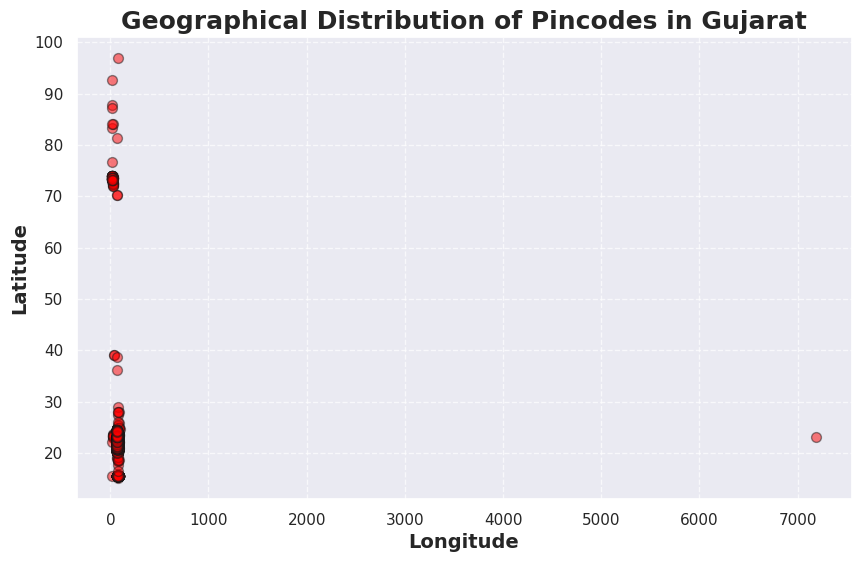

In [10]:
#DATA VISUALIZATION
plt.figure(figsize=(10, 6))
plt.scatter(df_['Longitude'], df_['Latitude'], alpha=0.5, c='red', edgecolor='k', s=50, marker='o')
plt.title('Geographical Distribution of Pincodes in Gujarat', fontsize=18, weight='bold')
plt.xlabel('Longitude', fontsize=14, weight='bold')
plt.ylabel('Latitude', fontsize=14, weight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [11]:
df_.columns.tolist()

['CircleName',
 'RegionName',
 'DivisionName',
 'OfficeName',
 'Pincode',
 'OfficeType',
 'Delivery',
 'District',
 'StateName',
 'Latitude',
 'Longitude']

In [12]:
df__ = df_[df_.columns[[9,10]] ]

In [13]:
df__ = df__.dropna()

In [14]:
df__.columns.tolist()

['Latitude', 'Longitude']

In [15]:
df__.shape

(8864, 2)

In [16]:
df__.to_excel("STATEGUJARAT_LAT-LONG.xlsx")

In [17]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from pandas import read_csv
from pandas import DataFrame

In [18]:
scaler = StandardScaler()
data = scaler.fit_transform(df__)
df = DataFrame(data)

In [19]:
df.shape

(8864, 2)

In [20]:
sample_df = df__.sample(frac=0.01, random_state=42)  # Using 1% of the data
sample_df.shape

(89, 2)

In [21]:
sample_df.to_excel("Reduced_DATA.xlsx")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

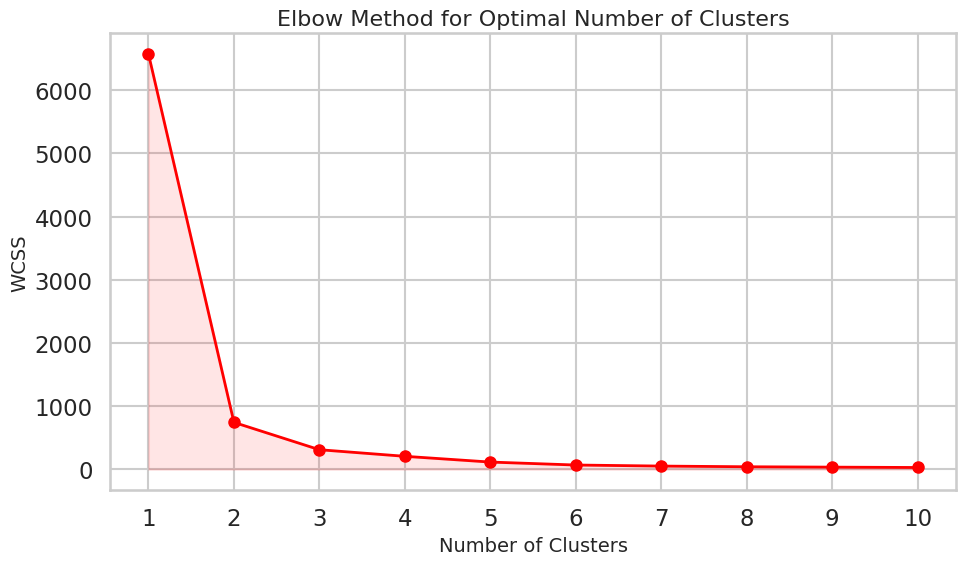

In [22]:
#Using Elbow method for finding K value
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

# Initialize WCSS list
wcss = []

# Calculate WCSS for different number of clusters
for i in range(1, 11):
    k_means = KMeans(n_clusters=i, init='k-means++', random_state=42, max_iter=50)
    k_means.fit(sample_df)
    wcss.append(k_means.inertia_)

# Set the style and context using Seaborn
sns.set(style="whitegrid", context="talk")

# Plot the elbow curve with different color and marker
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, 11), wcss, 'bo-', color='red', linewidth=2, markersize=8)
plt.fill_between(np.arange(1, 11), wcss, color='red', alpha=0.1)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('WCSS', fontsize=14)
plt.title('Elbow Method for Optimal Number of Clusters', fontsize=16)
plt.xticks(np.arange(1, 11, step=1))
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


**We found K=3**



In [23]:
k_means_optimum = KMeans(n_clusters = 3, init = 'k-means++',  random_state=42)
y = k_means_optimum.fit_predict(sample_df)

print(y)

[0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 2 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [24]:
centers = k_means_optimum.cluster_centers_
print(centers)

[[22.43368367 71.96708892]
 [73.5717     15.5934    ]
 [15.59226667 74.56554444]]


In [25]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_centroids(X, k):
    """Randomly initialize centroids from the dataset"""
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

def assign_clusters(X, centroids):
    """Assign clusters based on the closest centroid"""
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    """Update centroids to the mean of points in each cluster"""
    new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
    return new_centroids

def kmeans(X, k, max_iters=100, tol=1e-4):
    """K-means clustering algorithm"""
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids
    return labels, centroids

# Extract latitude and longitude data
X = sample_df.to_numpy()

# Set the number of clusters
k = 3  # Choose an optimal k based on the Elbow Method plot

# Apply K-means clustering
labels, centroids = kmeans(X, k)

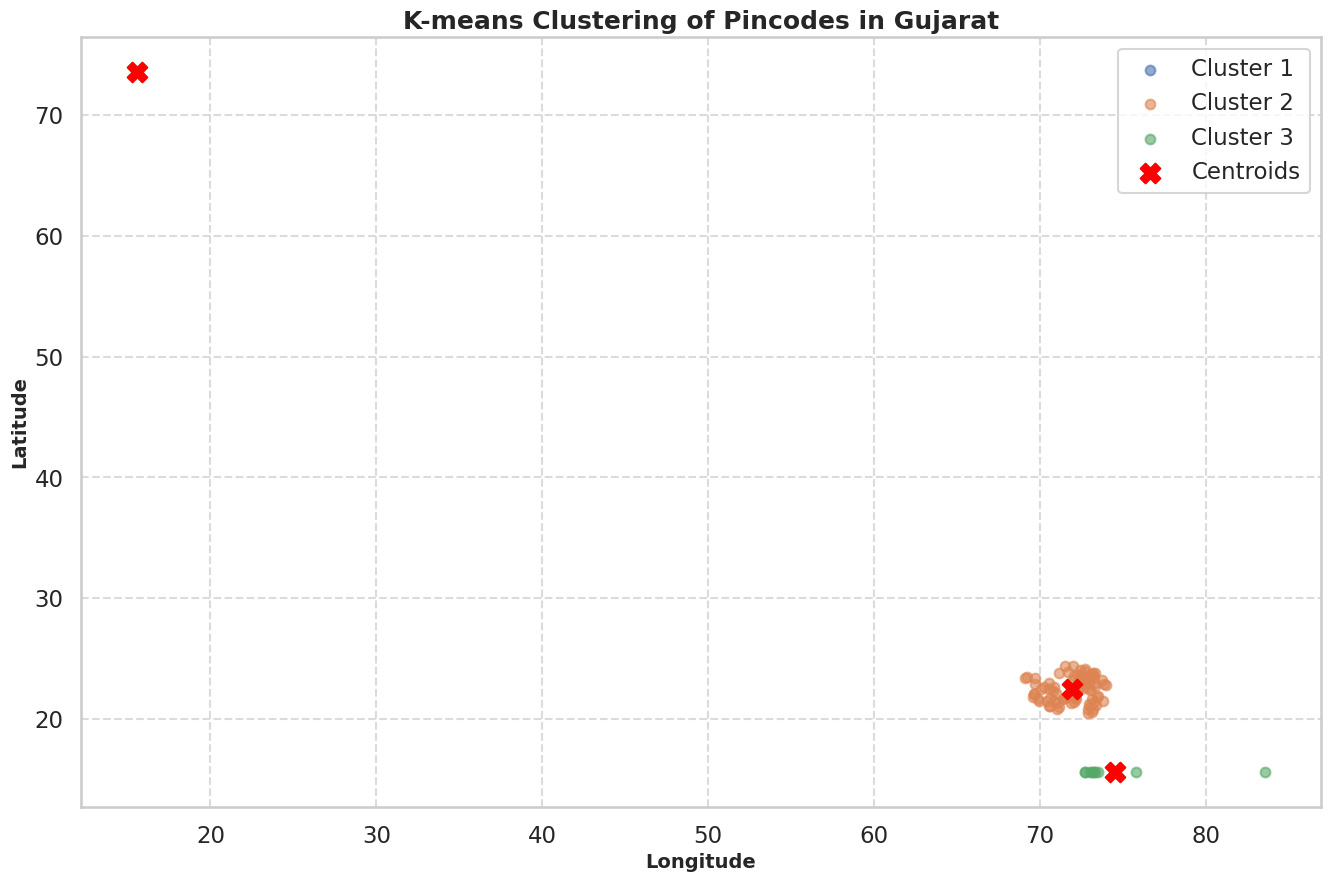

In [26]:
# Plot the clusters
plt.figure(figsize=(16, 10))
for i in range(k):
    plt.scatter(X[labels == i, 1], X[labels == i, 0], s=50, alpha=0.6, label=f'Cluster {i+1}')
plt.scatter(centroids[:, 1], centroids[:, 0], c='red', s=200, marker='X', label='Centroids')
plt.title('K-means Clustering of Pincodes in Gujarat', fontsize=18, weight='bold')
plt.xlabel('Longitude', fontsize=14, weight='bold')
plt.ylabel('Latitude', fontsize=14, weight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
